In [2]:
import kex_data
import kex_headers
import numpy as np
import matplotlib.pyplot as plt
import filefit
import e7tools
import importlib
importlib.reload(kex_data)

<module 'kex_data' from 'C:\\Users\\petct\\Desktop\\Hugo\\Code\\PythonMEX\\kex_data.py'>

In [3]:
norm_uniform_sino = kex_data.get_my_norms()[0]

In [4]:
my_norm_paths = kex_data.get_my_norm_paths()

In [5]:
my_norm = filefit.get_data(my_norm_paths[0], kex_headers.HISTOGRAM_SHAPE_NO_DELAYS, dtype=np.float32)

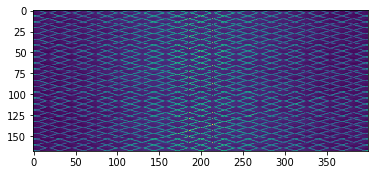

In [6]:
plt.imshow(my_norm[0,0])
plt.show()

In [7]:
for tofbin in range(1,13):
    diff = my_norm[0,0] - my_norm[tofbin, 0]
    print("diff sum", np.sum(diff))

diff sum 0.0
diff sum 0.0
diff sum 0.0
diff sum 0.0
diff sum 0.0
diff sum 0.0
diff sum 0.0
diff sum 0.0
diff sum 0.0
diff sum 0.0
diff sum 0.0
diff sum 0.0


Text(0, 0.5, 'tx')

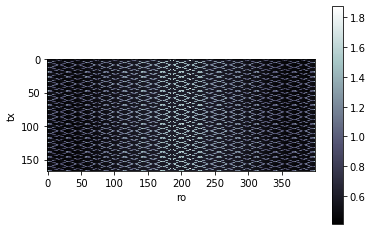

In [14]:
plt.imshow(norm_uniform_sino[50], cmap='bone')
plt.colorbar()
plt.xlabel("ro")
plt.ylabel("tx")

In [193]:
denormed_sino = np.zeros(kex_headers.HISTOGRAM_SHAPE, dtype=np.uint16)
denorm = np.round((1/norm_uniform_sino))
for tofbin in range(13):
    denormed_sino[tofbin] = denorm

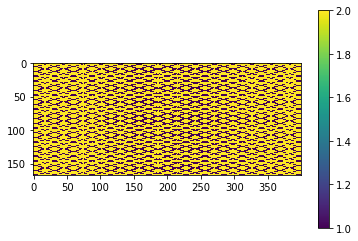

Text(0, 0.5, 'tx')

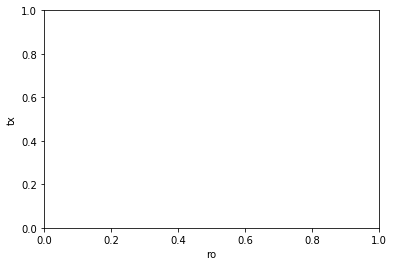

In [194]:
plt.imshow(denormed_sino[0,50])
plt.colorbar()
plt.show()
plt.xlabel("ro")
plt.ylabel("tx")

In [195]:
test_dir = r"C:/Users/petct/Desktop/Hugo/Code/PythonMEX/test_my_norm"
source_hdr = kex_data.get_sino_hdrs()[0]
source_mhdr = kex_data.get_sino_mainhdrs()[0]
filefit.prep_folder(test_dir, [source_mhdr, source_hdr])

In [196]:
source_sino_path = kex_data.get_sino_paths()[0]
test_sino_path = filefit.refolder_path(test_dir, source_sino_path)
with open(test_sino_path, 'wb') as f:
    f.write(denormed_sino)

In [143]:
test_mhdr = filefit.refolder_path(test_dir, source_mhdr)
recon_mhdr = test_dir + "/denormed.mhdr"
e7tools.kex_recon(test_mhdr, kex_data.NORM_PATH, recon_mhdr)

stdout
 b''
stderr
 b"I 06/02/2020 12:30:49.150 (UTC+01:00) Intel(R) Core(TM) i7-7820HQ CPU @ 2.90GHz (1x)    memory: 32629 MByte
I 06/02/2020 12:30:49.150 (UTC+01:00) Number of NUMA nodes: 1
I 06/02/2020 12:30:49.150 (UTC+01:00) Number of physical processor packages: 1
I 06/02/2020 12:30:49.150 (UTC+01:00) Number of processor cores: 4
I 06/02/2020 12:30:49.150 (UTC+01:00) Number of logical processors: 8
I 06/02/2020 12:30:49.150 (UTC+01:00) Number of processor L1/L2/L3 caches: 8/4/1 
I 06/02/2020 12:30:49.150 (UTC+01:00) Hyper-Threadingin BIOS Enabled.
I 06/02/2020 12:30:49.150 (UTC+01:00)  supported CPU features: MMX,SSE,SSE2,SSE3,SSE4.1,SSE4.2,AVX
I 06/02/2020 12:30:49.668 (UTC+01:00) GPU Driver Version: 24.20.100.6286
I 06/02/2020 12:30:49.668 (UTC+01:00) GPU Driver supported CUDA Version: 9010
I 06/02/2020 12:30:49.668 (UTC+01:00) CUDA Run-time Version Used: 5000
I 06/02/2020 12:30:49.669 (UTC+01:00) Quadro M620 1017 MHz (Compute Capability 5.0)
I 06/02/2020 12:30:49.669 (UTC+01:0

0

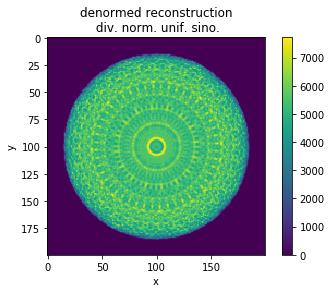

In [146]:
v_path = kex_data.get_v_path(recon_mhdr)
recon = filefit.get_v_data(v_path)
plt.imshow(recon[50])
plt.colorbar()

plt.xlabel("x")
plt.ylabel('y')
plt.title("uniform sinogram recon. \n div. norm. unif. sino.");

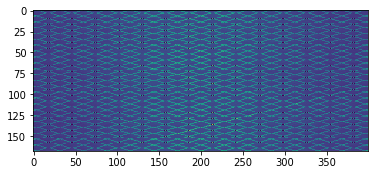

In [177]:
# now try with the "pure" norms
original_norm = kex_data.get_norm_factors()[0][0]
plt.imshow(original_norm[0])


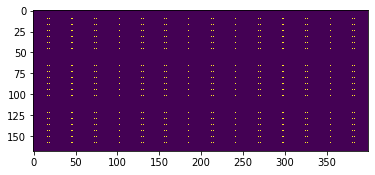

In [178]:
plt.imshow(1*(original_norm[0]==0))

In [179]:
is_zero = original_norm == 0
original_norm[is_zero] = 1 

In [180]:
denormed_sino = np.zeros(kex_headers.HISTOGRAM_SHAPE, dtype=np.uint16)
denorm = np.round((1/original_norm))
for tofbin in range(13):
    denormed_sino[tofbin] = denorm

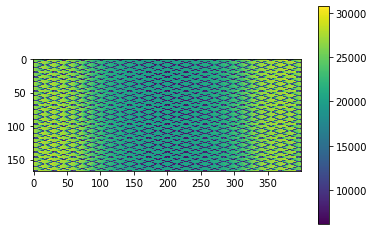

In [181]:
plt.imshow(np.sum(denormed_sino, axis=(0,1)))
plt.colorbar()
plt.show()

In [182]:
source_sino_path = kex_data.get_sino_paths()[0]
test_sino_path = filefit.refolder_path(test_dir, source_sino_path)
with open(test_sino_path, 'wb') as f:
    f.write(denormed_sino)

In [130]:
test_mhdr = filefit.refolder_path(test_dir, source_mhdr)
recon_mhdr = test_dir + "/denormed.mhdr"
e7tools.kex_recon(test_mhdr, kex_data.NORM_PATH, recon_mhdr)

stdout
 b''
stderr
 b"I 06/02/2020 12:22:08.597 (UTC+01:00) Intel(R) Core(TM) i7-7820HQ CPU @ 2.90GHz (1x)    memory: 32629 MByte
I 06/02/2020 12:22:08.597 (UTC+01:00) Number of NUMA nodes: 1
I 06/02/2020 12:22:08.597 (UTC+01:00) Number of physical processor packages: 1
I 06/02/2020 12:22:08.597 (UTC+01:00) Number of processor cores: 4
I 06/02/2020 12:22:08.597 (UTC+01:00) Number of logical processors: 8
I 06/02/2020 12:22:08.597 (UTC+01:00) Number of processor L1/L2/L3 caches: 8/4/1 
I 06/02/2020 12:22:08.597 (UTC+01:00) Hyper-Threadingin BIOS Enabled.
I 06/02/2020 12:22:08.597 (UTC+01:00)  supported CPU features: MMX,SSE,SSE2,SSE3,SSE4.1,SSE4.2,AVX
I 06/02/2020 12:22:08.815 (UTC+01:00) GPU Driver Version: 24.20.100.6286
I 06/02/2020 12:22:08.816 (UTC+01:00) GPU Driver supported CUDA Version: 9010
I 06/02/2020 12:22:08.816 (UTC+01:00) CUDA Run-time Version Used: 5000
I 06/02/2020 12:22:08.816 (UTC+01:00) Quadro M620 1017 MHz (Compute Capability 5.0)
I 06/02/2020 12:22:08.816 (UTC+01:0

0

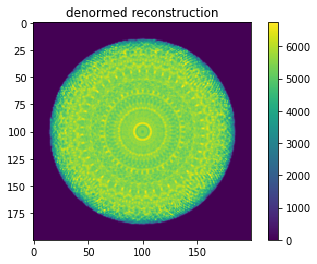

In [131]:
v_path = kex_data.get_v_path(recon_mhdr)
recon = filefit.get_v_data(v_path)
plt.imshow(recon[50])
plt.colorbar()

plt.xlabel("x")
plt.ylabel('y')
plt.title("denormed reconstruction\noriginal norm");

In [197]:
output_emission = test_dir + "/eo.mhdr"
e7tools.recon_intermediates(test_mhdr, kex_data.NORM_PATH, output_emission)

stdout
 b''
stderr
 b"I 06/02/2020 15:51:24.892 (UTC+01:00) Intel(R) Core(TM) i7-7820HQ CPU @ 2.90GHz (1x)    memory: 32629 MByte
I 06/02/2020 15:51:24.892 (UTC+01:00) Number of NUMA nodes: 1
I 06/02/2020 15:51:24.892 (UTC+01:00) Number of physical processor packages: 1
I 06/02/2020 15:51:24.892 (UTC+01:00) Number of processor cores: 4
I 06/02/2020 15:51:24.892 (UTC+01:00) Number of logical processors: 8
I 06/02/2020 15:51:24.892 (UTC+01:00) Number of processor L1/L2/L3 caches: 8/4/1 
I 06/02/2020 15:51:24.892 (UTC+01:00) Hyper-Threadingin BIOS Enabled.
I 06/02/2020 15:51:24.893 (UTC+01:00)  supported CPU features: MMX,SSE,SSE2,SSE3,SSE4.1,SSE4.2,AVX
I 06/02/2020 15:51:25.132 (UTC+01:00) GPU Driver Version: 24.20.100.6286
I 06/02/2020 15:51:25.133 (UTC+01:00) GPU Driver supported CUDA Version: 9010
I 06/02/2020 15:51:25.133 (UTC+01:00) CUDA Run-time Version Used: 5000
I 06/02/2020 15:51:25.133 (UTC+01:00) Quadro M620 1017 MHz (Compute Capability 5.0)
I 06/02/2020 15:51:25.133 (UTC+01:0

0

In [198]:
norm_denorm_sino_path = output_emission.replace(".mhdr", "_00.s")
norm_denorm_sino = filefit.get_data(norm_denorm_sino_path, kex_headers.HISTOGRAM_SHAPE_NO_DELAYS, dtype=np.float32)

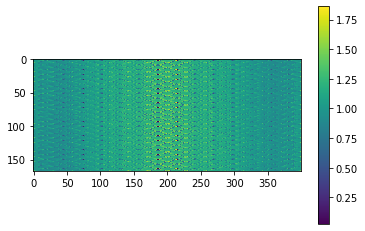

In [199]:
plt.imshow(norm_denorm_sino[0,50])
plt.colorbar()

In [186]:
#norm_denorm_sino_backup = norm_denorm_sino

In [200]:
diff = norm_denorm_sino_backup- norm_denorm_sino
print(np.sum(diff))

2434257.0


Text(0, 0.5, 'tx')

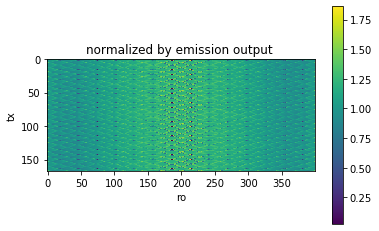

In [206]:
plt.imshow(norm_denorm_sino_backup[0,50])
plt.colorbar()
plt.title("normalized by emission output ")
plt.xlabel("ro")
plt.ylabel("tx")

Text(0, 0.5, 'tx')

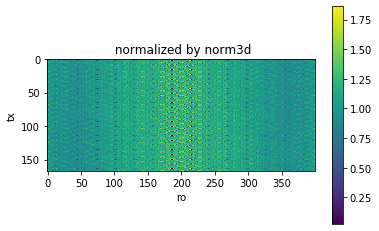

In [207]:
plt.imshow(norm_denorm_sino[0,50])
plt.colorbar()
plt.title(" normalized by norm3d")
plt.xlabel("ro")
plt.ylabel("tx")